# Filtro Butterworth

En el dominio transformado de Fourier, la aplicación de un filtro Butterworth viene dada por 

$$\mathbf{F}\,[\,U^f(x,y,z_0)\,]=\mathbf{F}\,[b]\;\mathbf{F}\,[\,U(x,y,z_0)\,],$$ con $$\mathbf{F}\,[\,b\,]=\frac{1}{\sqrt{\,1+(k_r/k_c)^n\,}},$$ la transformada bidimensional de Fourier del filtro de paso bajo Butterworth con orden $n$ y número de onda radial de corte $k_c$; siendo $k_r=||\mathbf{k}||=\sqrt{k^2_x+k^2_y\,}$, la norma del vector número de onda. El orden $n$ define lo abrupto de la caída del filtro hacia los $k_r$ altos.

El filtro de Butterworth es muy aplicado en los métodos potenciales de prospección. Aplicar este filtro consiste en definir un orden $n$ y número de onda radial de corte $k_c$ adecuados, calcular la transformada discreta bidimiensional de Fourier del dato observado $\,\mathbf{F}[U]\,$ y del filtro $\,\mathbf{F}[b]\,$, hacer el producto y antitransformar.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

## El operador de paso bajo Butterworth

Graficamos el espectro de amplitud del operador de paso bajo Butterworth $\mathbf{F}[b]$. A los fines ilustrativos, consideramos $n=8$ y ubicamos el número de onda adimensional de corte en $\pi/2$.

In [2]:
# Números de onda
mx,my   = 100,100   
dx,dy   = 1.,1.                                  
kx      = 2*np.pi*np.fft.fftfreq(mx)/dx          
ky      = 2*np.pi*np.fft.fftfreq(my)/dy          
kkx,kky = np.meshgrid(kx,ky)
kr      = np.sqrt(kkx*kkx + kky*kky)             

# Filtro:
n       = 8
kc      = np.pi/2
F       = 1./np.sqrt(1.+(kr/kc)**n)

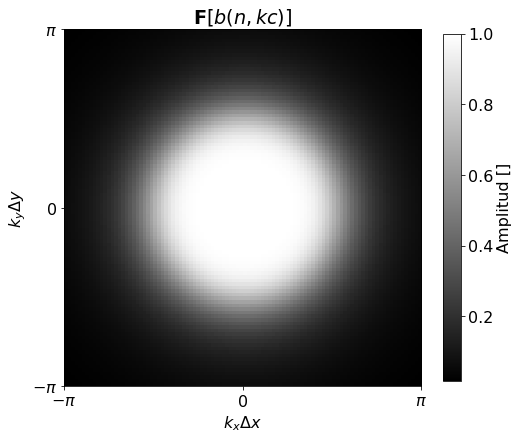

In [3]:
# Gráfico del espectro de amplitud del filtro

def espectro(dato,nombre):
  shift   = np.abs(np.fft.fftshift(dato))
  extent  = [-np.pi,np.pi,-np.pi,np.pi,]
  
  plt.figure(facecolor='w',figsize=(8,8))
  plt.title(title[0])
  plt.xlabel('$k_x \Delta x$'); plt.ylabel('$k_y \Delta y$') 
  plt.xticks([-np.pi,0,np.pi],['$-\pi$','$0$','$\pi$']); plt.yticks([-np.pi,0,np.pi],['$-\pi$','$0$','$\pi$'])
  im=plt.imshow(shift,cmap='gray',extent=extent,interpolation=None)
  plt.colorbar(im,orientation='vertical',shrink=0.8).set_label('Amplitud []')
  plt.show()
  return

title=['$\mathbf{F}[b(n,kc)]$']
espectro(F,title)

Efectivamente estamos ante un filtro pasabajas, que permite el paso de números de onda radial bajos, hasta $k_c=\pi/2$ y anula los mayores a él, con una banda de paso suave de orden n=8. 

Cuando vemos el espectro de amplitud de los datos, por lo general la información de interés queda concentrada en el centro del mismo, y si hay ruido, algún ruido estructural y fácil, se aleja del centro. Entonces esto es justamente lo que hace este filtro pasabajas: le da importancia al centro del espectro y lo demás lo hace tender a cero.

# Aplicación: dato sintético
La componente vertical de la atracción gravitatoria debida a una esfera con contraste de densidad $\Delta \sigma$ viene dada por:
$$g_z(\mathbf{r},\mathbf{r_0})=\mathbf{g⋅\hat{k}}=\dfrac{4}{3} \pi\;G\;\Delta \sigma\;R^3 \dfrac{z−z_0}{(\sqrt{\,(x−x_0)\,^2+(y−y_0)\,^2+(z−z_0)\,^2\,}\;)\,^3}.$$

donde $\mathbf{r}=(x,y,z)$ son las coordenadas del punto de observación, $\mathbf{r_0}=(x_0,y_0,z_0)$ las coordenadas del centro de la esfera, $R$ el radio de la misma y $r^2=||\mathbf{r−r_0}||_2^2=(x−x_0)^2+(y−y_0)^2+(z−z_0)^2$.
\
\
Generamos un dato sintético de dos cuerpos esféricos con cierto contraste de densidad. Para ello, escribimos una subrutina para el cálculo de $g_z$ y elegimos parámetros de campaña adecuados. Además, escribimos una pequeña subrutina para conocer los rangos de la anomalía generada, de forma de controlar resultados y comparar.

In [4]:
def gz_esfera (X,rho,R,X0):
    
  # Componente vertical de la anomalía de una esfera [mGal]
  # rho : contraste de densidad [kg/m3]
  # R   : radio de la esfera [m]
  # X   = (x,y,z) punto de medición [m] (z=0)
  # X0  = (x0,y0,z0) posición del centro de la esfera [m]

    G        = 6.67e-11                                                    # [m3 / kg s2]
    cte      = (4./3.)*np.pi*G*rho*(R**3)
    convert  = 1e5                                                         # [m/s2] to [mGal]
    x,y,z    = X                                                          
    x0,y0,z0 = X0                                                          
    g        = cte*(z-z0)/(np.sqrt((x-x0)**2+(y-y0)**2+(z-z0)**2)**3)

    return convert*g

In [5]:
def  ranges(data):
    
    print('gz mínimo   : {0} [mGal]'.format(np.round(np.min(data),2)))
    print('gz máximo   : {0} [mGal]'.format(np.round(np.max(data),2)))
    print('gz promedio : {0} [mGal]'.format(np.round(np.mean(data),2)))
    
    return

In [6]:
# Puntos de Observación:

# Grilla

Lx      = 1100                      # [m] 
Ly      = 1100                      # [m]

nx, ny  = (81,81)                   # dimensión de la grilla
xx      = np.linspace(-Lx, Lx, nx)  # [m] largo total del lado 2L
yy      = np.linspace(-Ly, Ly, ny)  # [m]
x, y    = np.meshgrid(xx, yy)       # grilla
z       = np.zeros_like(x)          # [m]

# dx, dy para núm. de onda:

dx      = x[0,1] - x[0,0]; #print('dx=',dx,'m')
dy      = y[1,0] - y[0,0]; #print('dy=',dy,'m')

In [7]:
# Parámetros del modelo:

drho  =  500.0  # [kg/m3] Contraste de densidad de las esferas
r     =  200.0  # [m] Radio de las esferas
x01   =  240.0  # [m] x de esf1
x02   = -240.0  # [m] x de esf2
y0    =    0    # [m] Centro de la grilla
z0    = -400    # [m] Profundidad

Calculamos la anomalía y sus rangos.

In [8]:
# Anomalía:

g1        = gz_esfera(X=[x,y,z],rho=drho,R=r,X0=[x01,y0,z0])    # [mGal]
g2        = gz_esfera(X=[x,y,z],rho=drho,R=r,X0=[x02,y0,z0])    # [mGal]
anomalia  = g1 + g2

print('Rangos de la anomalía')
ranges(anomalia)

Rangos de la anomalía
gz mínimo   : 0.02 [mGal]
gz máximo   : 0.91 [mGal]
gz promedio : 0.19 [mGal]


**Nota**. Para hacer evidente el efecto del filtro, adicionamos ruido aleatorio a la anomalía. El ruido está dado por una distribución Gaussiana $\mathbf{N}(0,\sigma)$; ajustándose la desviación standar $\sigma$ a cierto porcentaje de la amplitud máxima de la anomalía observada.

In [9]:
# Ruido
np.random.seed(2020)                                    # para poder reproducir los mismos resultados
noise     = np.random.normal(size=(nx,ny),scale=0.02)

anomalia2 = anomalia + noise                            # [mGal]
print('Rangos de la anomalía con ruido adicionado')
ranges(anomalia2)                                       # para controlar que el ruido no altere sustancialmente al dato

Rangos de la anomalía con ruido adicionado
gz mínimo   : -0.02 [mGal]
gz máximo   : 0.93 [mGal]
gz promedio : 0.19 [mGal]


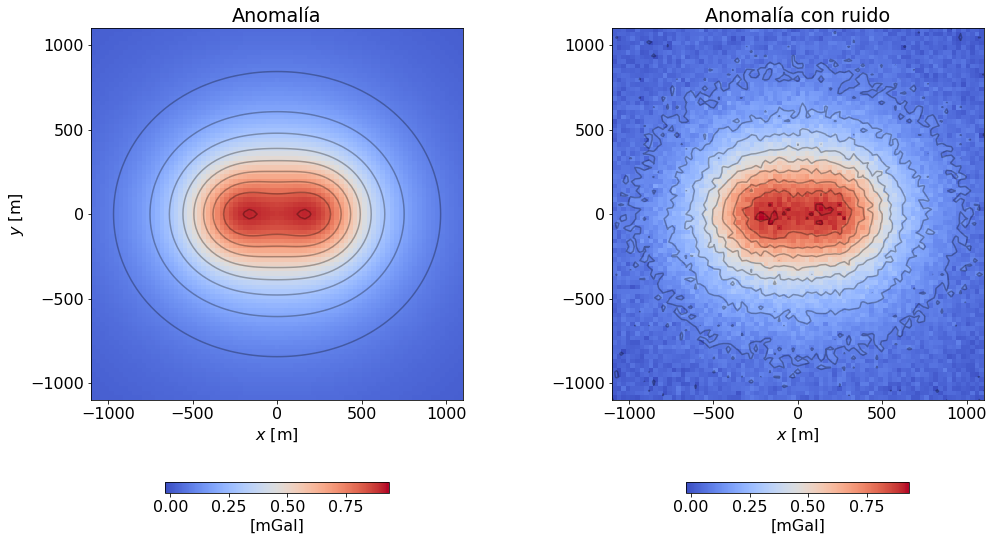

In [10]:
# Gráfica del dato + dato con ruido

titulos = ['Anomalía','Anomalía con ruido']
data    = [anomalia,anomalia2]
vmin    = np.min(data)  ; vmax    = np.max(data)

cmap    ='coolwarm'                              
levels  = 10                                       # curvas de nivel de gz
ticks   = (-1000,-500,0,500,1000)

plt.figure(2,facecolor='w',figsize=(16,10))
plt.subplots_adjust(wspace=0.4)
for i in np.arange(len(data)):
  plt.subplot(1,len(data),i+1)
  plt.title(titulos[i])
  plt.xlabel('$x$ [m]')
  if i==0:
     plt.ylabel('$y$ [m]')
  plt.xticks(ticks=ticks); plt.yticks(ticks=ticks)
  im=plt.imshow(data[i],cmap=cmap,origin='lower',extent=[x.min(),x.max(),y.min(),y.max()],\
                vmin=vmin,vmax=vmax,interpolation=None)
  cb=plt.colorbar(im,orientation='horizontal',shrink=0.6).set_label('[mGal]')
  plt.contour(x,y,data[i],levels,linestyles='-',colors='black',alpha=0.3) 
plt.show()

Calculamos su espectro de amplitud.

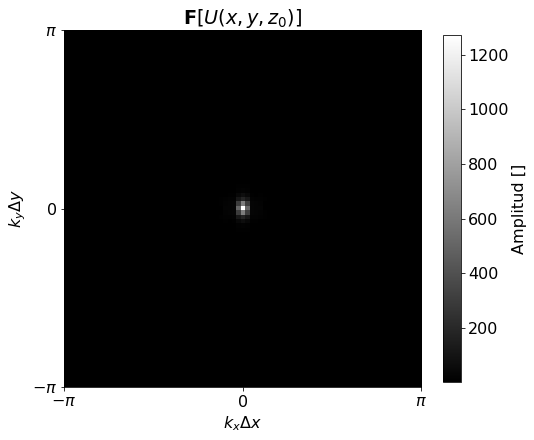

In [11]:
# Espectro de amplitud de nuestro dato (Anomalíía con ruido)
title=['$\mathbf{F}[U(x,y,z_0)]$']
espectro(np.fft.fft2(anomalia2),title)

Energía concentrada en torno al origen como esperábamos.

## Procesamiento

Elegimos valores de $n$ y $k_c$, y aplicamos el filtro.

Estos filtros se construyen por prueba y error: filtramos, revisamos si los efectos son los deseados, sino modificamos parámetros y volvemos a filtrar. Continuamos hasta llegar a resultados que nos sean significativos.





In [12]:
n      = 8
krc    = np.pi/100     # [1/m]

print('Filtro Butterworth de paso bajo: orden n = {0} y corte en k_c = {1} [1/m]'.format(n,np.round(krc,3)))

Filtro Butterworth de paso bajo: orden n = 8 y corte en k_c = 0.031 [1/m]


In [13]:
def butterworth(dato,L,A,n,kc):
    
  # dato : matriz nx x ny a filtrar
  # L    : largo del area en [m]
  # A    : ancho del area en [m]
  # n    : orden del filtro, rapidez con la que cae la banda de transición
  # kc   : número de onda radial de corte en [1/m]

  nx,ny   = dato.shape
  dx      = L/nx  ;  dy  = A/ny                  # [m]

  kx      = 2*np.pi*np.fft.fftfreq(nx)/dx        # [1/m]
  ky      = 2*np.pi*np.fft.fftfreq(ny)/dy        # [1/m]
  kkx,kky = np.meshgrid(kx,ky)
  kr      = np.sqrt(kkx*kkx + kky*kky)           # |k_r| en [1/m]

  #Filtro:
  F       = 1./np.sqrt(1.+(kr/kc)**n)

  #Filtrado:
  D       = np.fft.fft2(dato)
  DF      = F * D
  df      = np.real(np.fft.ifft2(DF))

  #Residuo:
  res     = anomalia2 - df                       #[mGal]

  return df, res

In [14]:
# Procesamiento del dato

filtrado,residuo  = butterworth(anomalia2,2*Lx,2*Ly,n,krc)

print('Rangos de la anomalía filtrada')
ranges(filtrado)

Rangos de la anomalía filtrada
gz mínimo   : 0.02 [mGal]
gz máximo   : 0.91 [mGal]
gz promedio : 0.19 [mGal]


## Resultados

Representamos gráficamente los resultados e interpretamos.


In [15]:
def plots(original,filtrada,diferencia):
    
  cmap    = 'coolwarm'
  levels  =   10
  
  vmin    = np.min([original.min(),filtrada.min()])
  vmax    = np.max([original.max(),filtrada.max()])
  extent  = [x.min(),x.max(),y.min(),y.max()]
  ticks   = (-1000,-500,0,500,1000)

  plt.figure(figsize=(26,10),facecolor='w')
  plt.rcParams.update({'font.size':22})
  plt.subplots_adjust(wspace=0.3)

  titles  = ['Anomalía','Anomalía filtrada','Residuo']
  datos   = [original,filtrada,diferencia]

  for j in np.arange(len(datos)):
      plt.subplot(1,3,j+1)
      plt.title(titles[j])
      im=plt.imshow(datos[j],cmap=cmap,extent=extent,vmin=vmin,vmax=vmax)
      plt.colorbar(im,orientation='horizontal',shrink=0.6).set_label('[mGal]')
      plt.contour(x,y,datos[j],levels,linestyles='-',colors='k',alpha=0.3)
      plt.xlabel('x [m]')
      if j==0:
        plt.ylabel('y [m]')
      plt.xticks(ticks=ticks); plt.yticks(ticks=ticks)
  plt.show()

  return

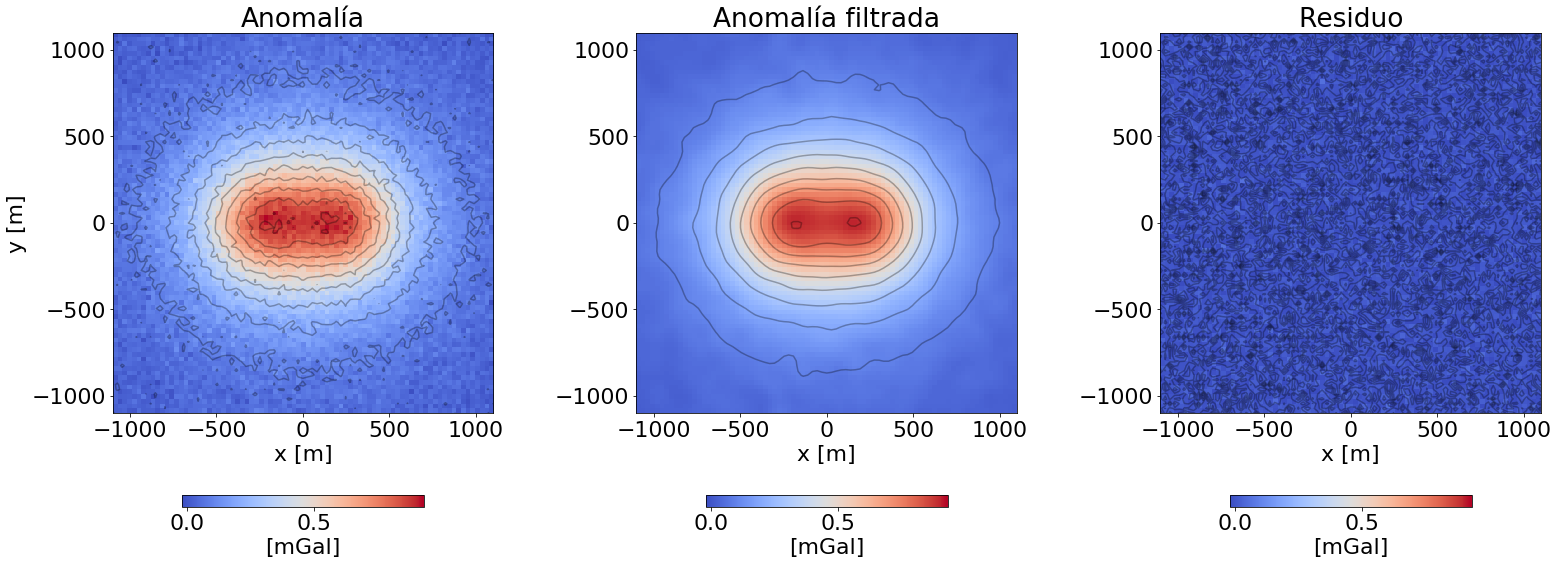

In [16]:
# Gráficas: Anomalía, Anomalía Filtrada y Residuo

plots(anomalia2,filtrado,residuo)

Con esta elección de orden y número de onda radial de corte, comparando las gráficas de la anomalía, la anomalía filtrada y el residuo, vemos que el filtro remueve ruido aparentemente aleatorio,
* sin organización o tendencias apreciables a esta escala, 
* sin distorsionar notablemente las estructuras de interés,
* minimizando los efectos de borde que se producen al filtrar,
* recuperando en buena medida las curvas de nivel. 

Con lo cual, consideramos a la elección $n=8$ y $k_c=\dfrac{\pi}{100\,m}$ exitosa.

Por último, visualizamos el residuo con una escala relativamente cercana a cero con el objeto de enfatizar la presencia de señal en él, y la imposibilidad de desacoplar completamente la señal de interés del ruido. Si bien se aprecia cierta estructura, su magnitud y la clara presencia de ruido aleatorio del mismo orden hace que tomemos la decisión de despreciarla.

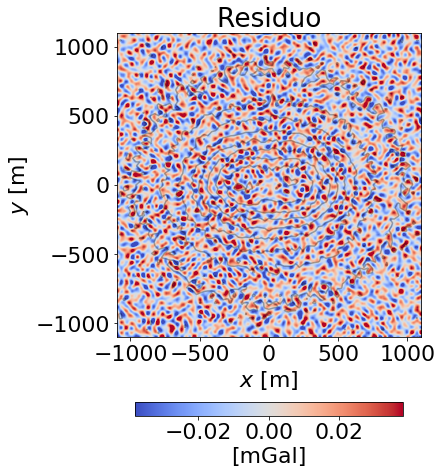

In [17]:
# Gráfica del residuo con una escala cercana a cero

plt.figure(facecolor='w',figsize=(16,8))
plt.title('Residuo')
plt.xlabel('$x$ [m]'); plt.ylabel('$y$ [m]')
plt.xticks(ticks=ticks); plt.yticks(ticks=ticks)
im=plt.imshow(residuo,cmap=cmap,origin='lower',interpolation='sinc',extent=[x.min(),x.max(),y.min(),y.max()],\
              vmin=0.6*np.min(residuo),vmax=0.6*np.max(residuo))
plt.colorbar(im,orientation='horizontal',shrink=0.3).set_label('[mGal]')
plt.contour(x,y,data[i],levels,linestyles='-',colors='black',alpha=0.3) 
plt.show()

## Visualización interactiva

Permite mostrar rápidamente qué es lo que le sucede a nuestro dato variando los parámetros del filtro, y qué es lo que estamos llamando ruido o residuo en cada caso.

In [18]:
from ipywidgets import interact,widgets

def plotter(nn,kkc):
    filt,residuo  = butterworth(anomalia2,2*Lx,2*Ly,nn,kkc)
    plots(anomalia2,filt,residuo)
    return

# parámetros explícitos para los sliders y descripción

n_slider   = widgets.FloatSlider(value=8,min=1.,max=15.,step=1.,description='$n$')
kc_slider  = widgets.FloatSlider(value=np.pi/100,min=0.005,max=0.09,step=0.02,description='$k_c [1/m]$')    

# gráfico interactivo con etiquetas

interact(plotter,nn=n_slider,kkc=kc_slider);

interactive(children=(FloatSlider(value=8.0, description='$n$', max=15.0, min=1.0, step=1.0), FloatSlider(valu…